In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.shape

(15039, 11)

In [4]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


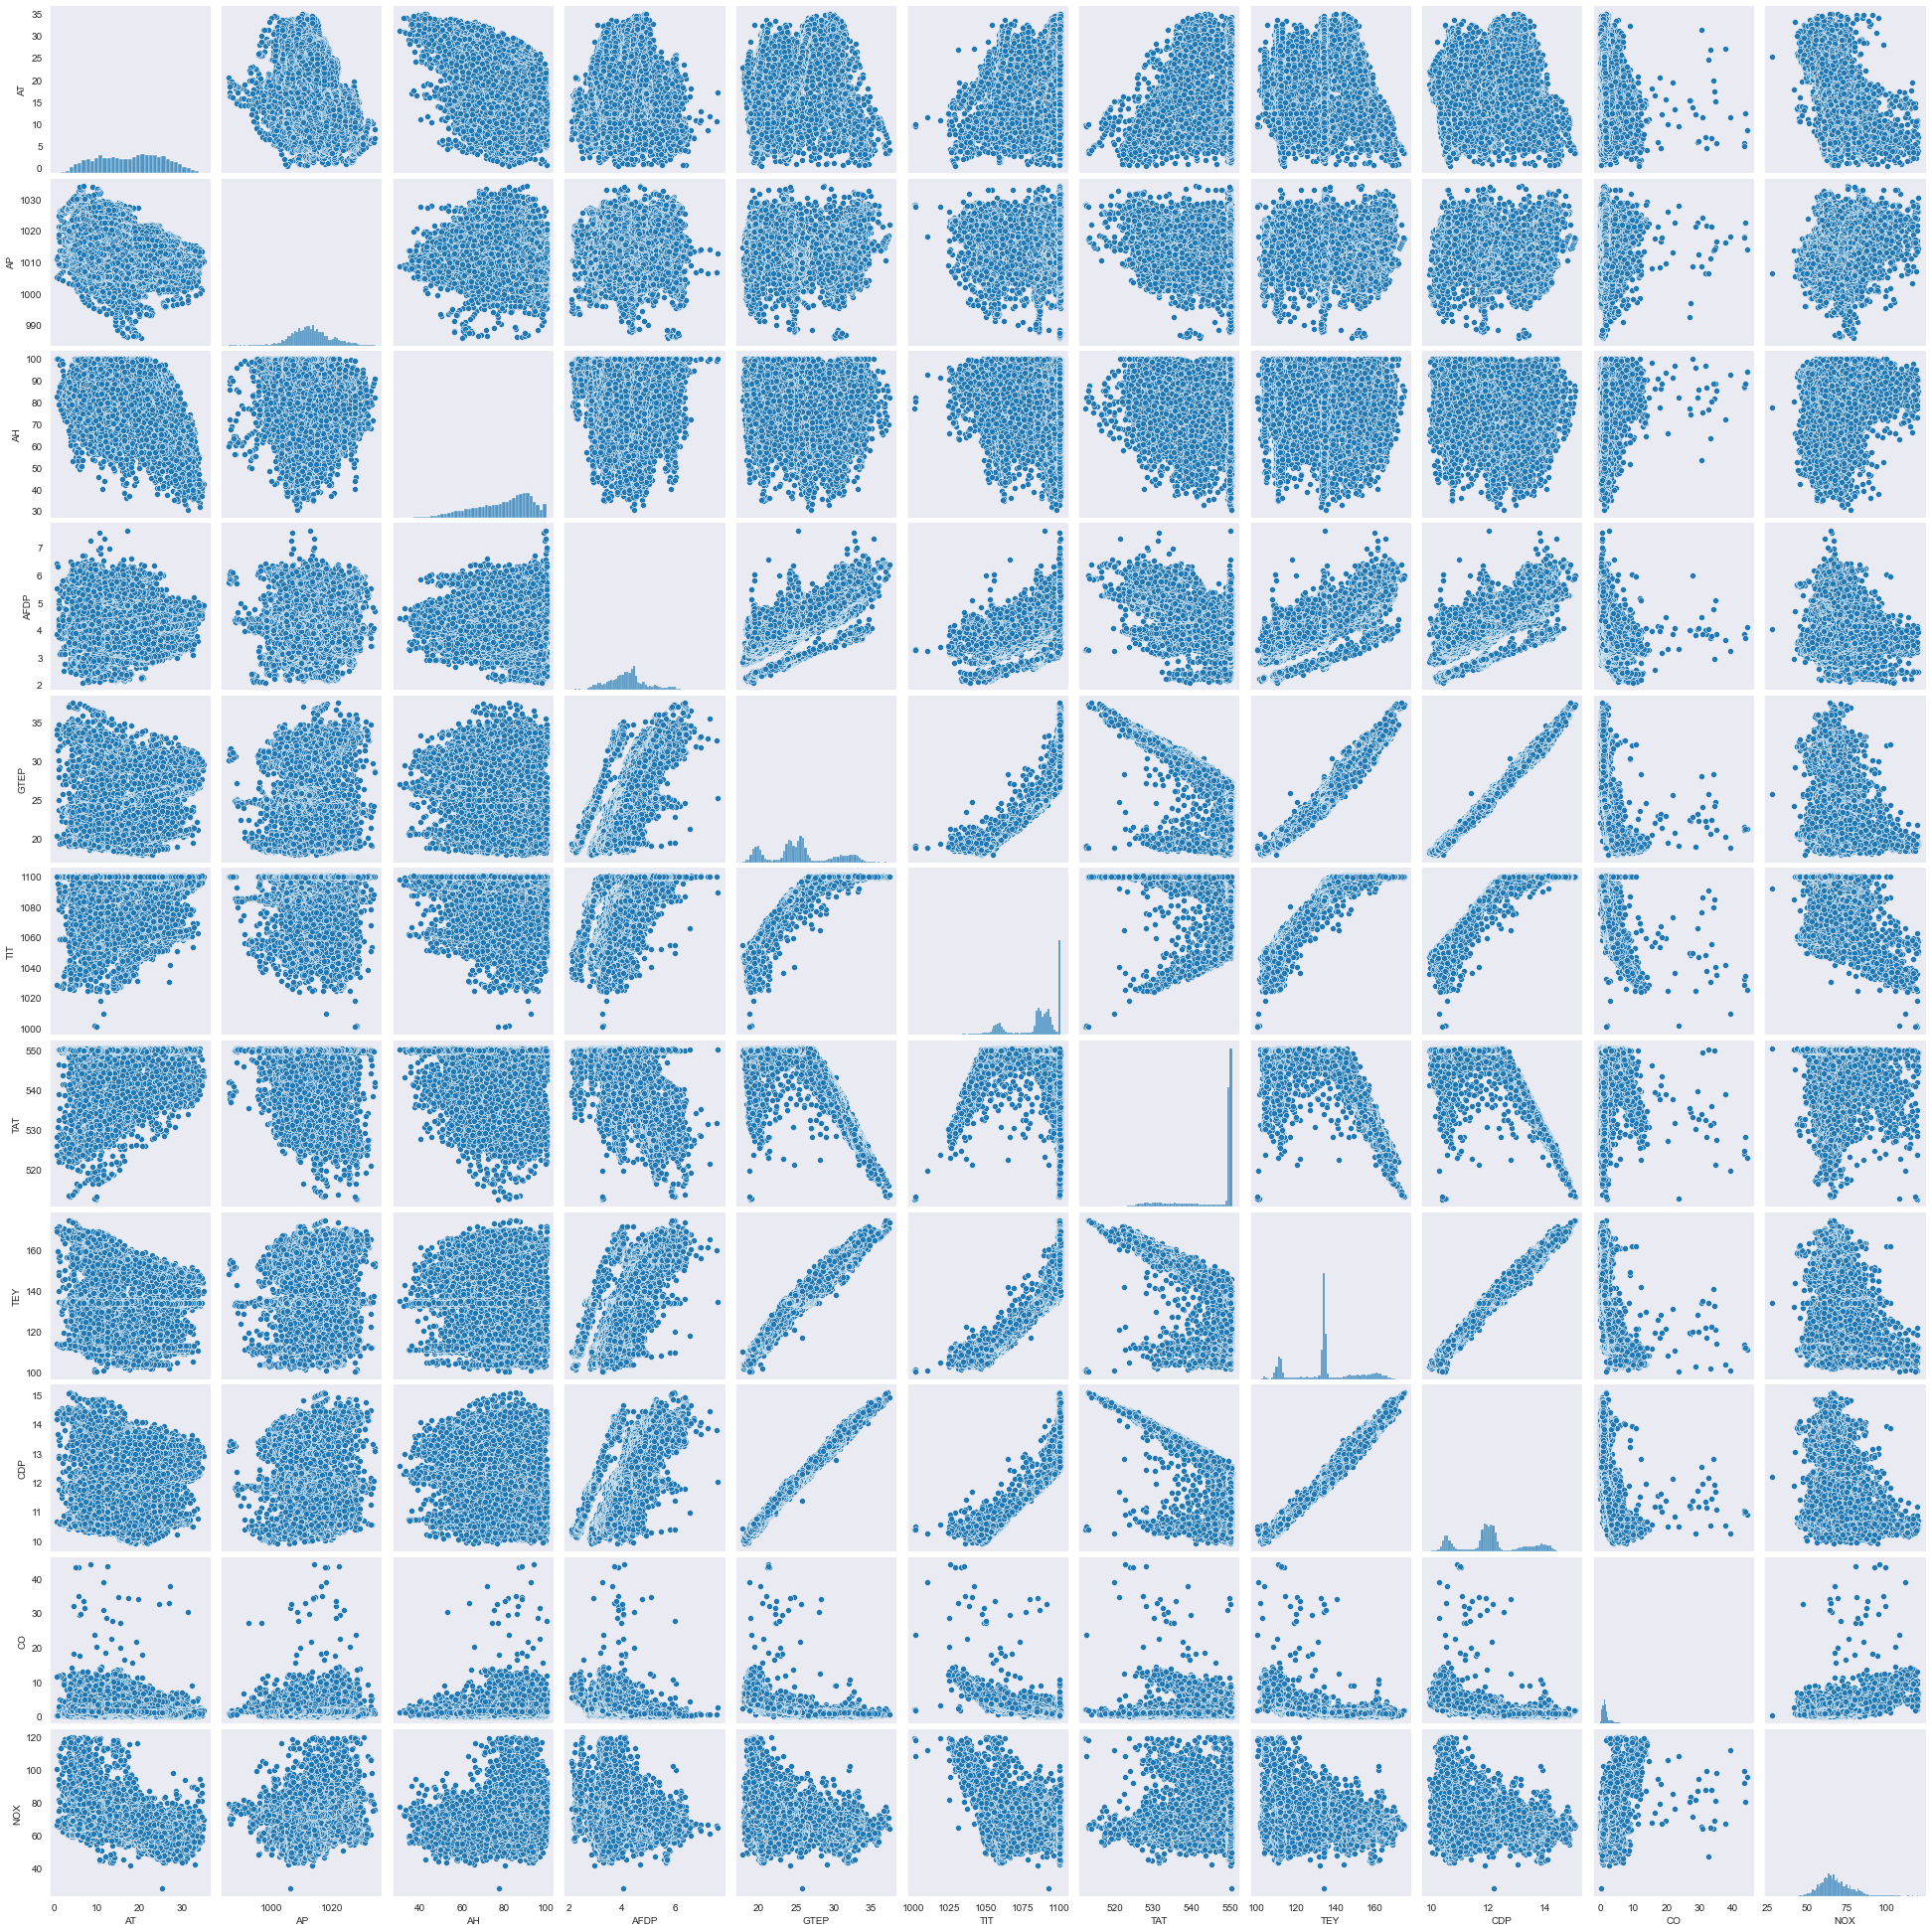

In [7]:
sns.pairplot(data)

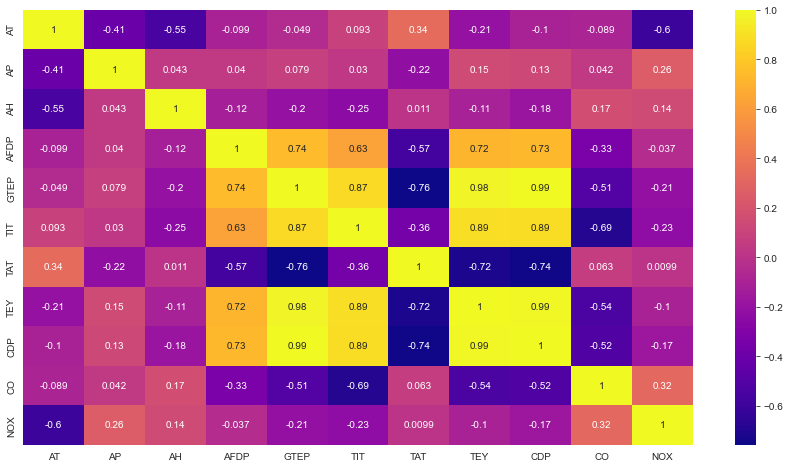

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), cmap='plasma', annot=True)
plt.show()

In [9]:
#Extract Features(X) and Target variable(Y)
X = data.drop('TEY', axis=1)
Y = data['TEY']

In [10]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=40)

In [13]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#Build neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#train the model
history = model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
301/301 [==============================] - 2s 3ms/step - loss: 7997.1611 - val_loss: 676.3495
Epoch 2/50
301/301 [==============================] - 1s 3ms/step - loss: 386.1751 - val_loss: 240.0724
Epoch 3/50
301/301 [==============================] - 1s 3ms/step - loss: 180.4890 - val_loss: 137.6941
Epoch 4/50
301/301 [==============================] - 1s 2ms/step - loss: 111.2614 - val_loss: 94.5882
Epoch 5/50
301/301 [==============================] - 1s 2ms/step - loss: 78.6678 - val_loss: 70.2984
Epoch 6/50
301/301 [==============================] - 1s 2ms/step - loss: 58.8905 - val_loss: 54.6398
Epoch 7/50
301/301 [==============================] - 1s 3ms/step - loss: 44.7583 - val_loss: 42.5668
Epoch 8/50
301/301 [==============================] - 1s 2ms/step - loss: 34.0205 - val_loss: 31.6846
Epoch 9/50
301/301 [==============================] - 1s 2ms/step - loss: 25.4764 - val_loss: 23.6870
Epoch 10/50
301/301 [==============================] - 1s 2ms/step - loss:

In [17]:
#Predictions on test set
y_pred = model.predict(X_test_scaled)

94/94 [==============================] - 0s 2ms/step


In [18]:
#Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.48737000167357475


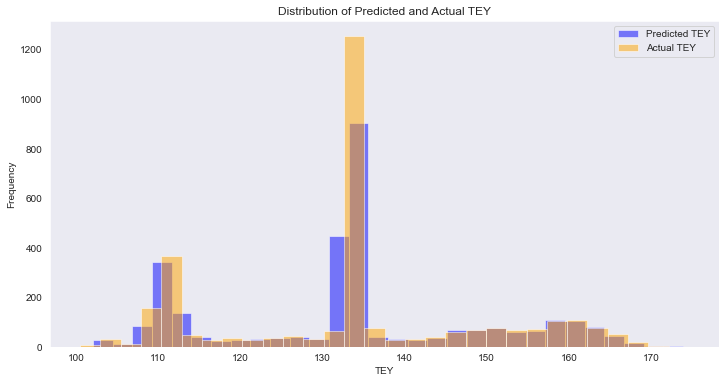

In [19]:
# Visualize predicted values distribution
plt.figure(figsize=(12, 6))
plt.hist(y_pred, bins=30, alpha=0.5, color='blue', label='Predicted TEY')
plt.hist(Y_test, bins=30, alpha=0.5, color='orange', label='Actual TEY')
plt.title('Distribution of Predicted and Actual TEY')
plt.xlabel('TEY')
plt.ylabel('Frequency')
plt.legend()
plt.show()

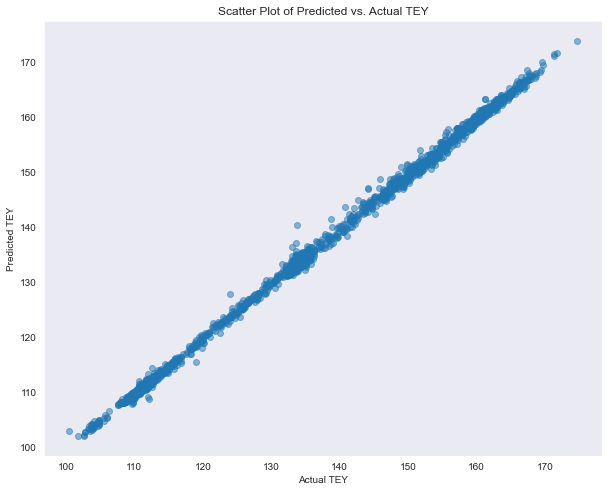

In [20]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot of Predicted vs. Actual TEY')
plt.xlabel('Actual TEY')
plt.ylabel('Predicted TEY')
plt.show()

In [21]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'val_loss'])

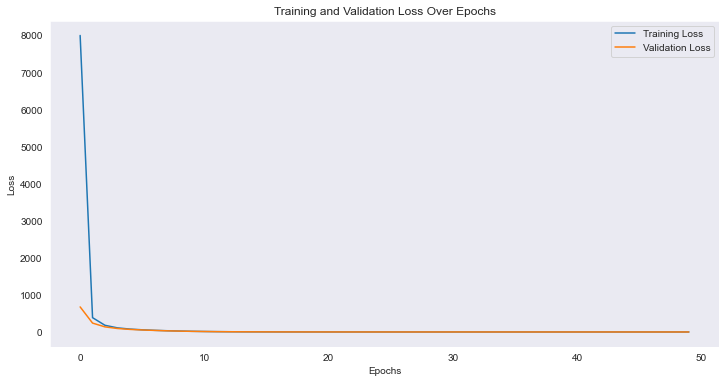

In [22]:
# Training/validation loss plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()